In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn


In [3]:
flower_data = pd.read_csv('Dataset/iris.data')
flower_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
flower_data['class'] = label_encoding.fit_transform(flower_data['class'].astype(str))


In [7]:
flower_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
flower_data = flower_data.sample(frac=1)


In [9]:
flower_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

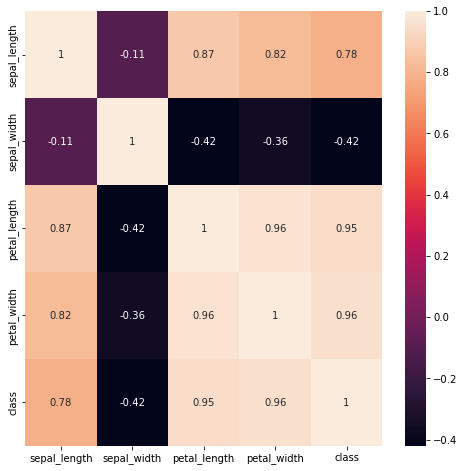

In [12]:
import seaborn as sns

fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(flower_data.corr(),annot = True)

In [19]:
X = flower_data.drop('class',axis =1)
Y = flower_data['class']

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1, whiten = True)
X_reduced = pca.fit_transform(X)
pca.explained_variance_


array([4.22484077])

In [49]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()

features_scaled = standard_scaler.fit_transform(X)
features_scaled_df = pd.DataFrame(features_scaled,columns = X.columns)

flower_data = pd.concat([features_scaled_df,flower_data['class']],axis = 1).reset_index(drop = True)

In [50]:
flower_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,-1.748856,0.337848,-1.398138,-1.312977,0
1,0.674501,-0.819166,0.876490,0.922064,0
2,0.553333,0.800654,1.047087,1.579429,0
3,-1.264185,0.106445,-1.227541,-1.312977,0
4,-0.294842,-0.819166,0.250967,0.133226,0


In [51]:
flower_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-4.457545e-16,-6.054416e-16,2.738550e-16,-2.190840e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00,0.000000
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00,0.000000
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01,1.000000
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01,2.000000
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00,2.000000


In [52]:
flower_data.shape
flower_data = flower_data.dropna()
flower_data.shape

(150, 5)

In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size =0.3,random_state=0)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

n_estimators = [10,50,100,200,250,500]
learning_rate = [0.001,0.01,0.1,0.25,0.5]

param_grid = {"n_estimators":n_estimators,
             "learning_rate":learning_rate}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=0),param_grid,cv=2,return_train_score=True,verbose =5)
grid_search.fit(x_train,y_train)



Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV 1/2] END learning_rate=0.001, n_estimators=10;, score=(train=0.365, test=0.358) total time=   0.0s
[CV 2/2] END learning_rate=0.001, n_estimators=10;, score=(train=0.358, test=0.365) total time=   0.0s
[CV 1/2] END learning_rate=0.001, n_estimators=50;, score=(train=0.712, test=0.566) total time=   0.0s
[CV 2/2] END learning_rate=0.001, n_estimators=50;, score=(train=0.679, test=0.615) total time=   0.0s
[CV 1/2] END learning_rate=0.001, n_estimators=100;, score=(train=1.000, test=0.868) total time=   0.1s
[CV 2/2] END learning_rate=0.001, n_estimators=100;, score=(train=1.000, test=0.904) total time=   0.1s
[CV 1/2] END learning_rate=0.001, n_estimators=200;, score=(train=1.000, test=0.868) total time=   0.1s
[CV 2/2] END learning_rate=0.001, n_estimators=200;, score=(train=1.000, test=0.904) total time=   0.1s
[CV 1/2] END learning_rate=0.001, n_estimators=250;, score=(train=1.000, test=0.868) total time=   0.2s
[CV 2/2

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5],
                         'n_estimators': [10, 50, 100, 200, 250, 500]},
             return_train_score=True, verbose=5)

In [55]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [56]:
gradient_boosting = GradientBoostingClassifier(learning_rate=grid_search.best_params_['learning_rate'],n_estimators = grid_search.best_params_['n_estimators'])
gradient_boosting.fit(x_train, y_train)
y_pred = gradient_boosting.predict(x_test)


In [57]:
pred_results = pd.DataFrame({'y_test':y_test,
                            'y_pred': y_pred})
pred_results.head(10)

,y_test,y_pred
40,0,0
59,1,1
46,0,0
74,1,1
128,2,2
90,1,1
2,0,0
7,0,0
67,1,1
12,0,0


In [58]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.9740129935032483